In [1]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
#0. Load  suicide pattern data
data= pd.read_csv('./suicide_mortrate2_final.csv') 

features = ['pesticide', 'other_poision','hanging','drowning', 'firearms','jumping']

In [10]:
# 1. separating out the features
x = data.loc[:, features].values

In [12]:
# 2. Standardizing the features
#    standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)
x = StandardScaler().fit_transform(x)

In [14]:
# 3. PCA anlaysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
finalDf

,principal component 1,principal component 2,iso_a2
0,-1.484599,0.532120,MU
1,-1.648424,0.337873,ROD
2,-1.805951,-0.115983,ZA
3,-0.713331,-0.500111,CA
4,0.239212,-1.545065,US
5,-1.656548,-0.067598,BH
6,-1.423068,0.066594,CY
7,-1.815531,-0.122276,EG
8,-1.824540,-0.122496,JO
9,-1.736948,-0.036930,KW


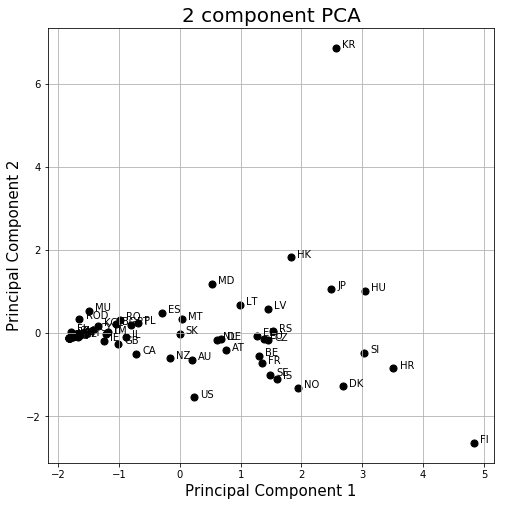

In [18]:
#4. Draw PCA plot
finalDf = pd.concat([principalDf, data[['iso_a2']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf.loc[:, 'principal component 1']
               , finalDf.loc[:, 'principal component 2']
               , c = 'black'
               , s = 50)

for x,y,text 
in zip(finalDf.loc[:,'principal component 1'],finalDf.loc[:,'principal component 2'],finalDf.loc[:,'iso_a2'].tolist()):
    ax.text(x+0.1, y, text)

ax.grid()

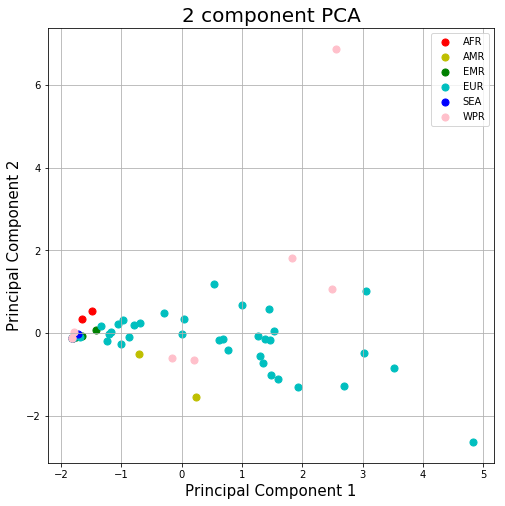

In [20]:
# 5. Draw PCA plot with group
finalDf = pd.concat([principalDf, data[['whoregion']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['AFR', 'AMR', 'EMR','EUR','SEA','WPR']
colors = ['r', 'y', 'g', 'c','b','pink']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['whoregion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              )
    
ax.legend(targets)
ax.grid()
